<div style="background-color:floralwhite">
    <H1 align="center" style="padding-top:20px;color:firebrick"><span style="font-size:25px;"><U><I><B>Human Resource Analytics: Predicting Employee Churn</B></I></U></span></H1>
    <H3 align="center" style="color:green"><i><u>Taught by:</u></i></H3>
    <H3 align="center" style="color:midnightblue">Hrant Davytan</H3>
    <H3 align="center" style="color:midnightblue">Assistant Professor of Data Science</H3>
    <H3 align="center" style="color:midnightblue">American University of Armenia</H3>
    <H3 align="center" style="color:green"><i><u>Presented by:</u></i></H3>
    <H3 align="center" style="color:midnightblue">Shubham Jain</H3>
    <H3 align="center" style="color:midnightblue">PGDM (Research & Business Analytics)</H3>
    <H3 align="center" style="color:midnightblue">Lal Bahadur Shastri Institute of Management</H3>
</div>

![Employee Churn](https://blog.bonus.ly/hubfs/employee-turnover.png)

# What is HR Analytics?

- People Analytics
- Data Driven Approach to manage people at work

# What is Employee Turnover?

- One of the problem addressed by HR Analytics
- Process of Employees leaving the the company
- Also known as Employee Attrition or Employee Churn
- May result in high cost for the company
- May affect company's retention or hiring decision

# Problem Statement:

- Predicting Employee Turnover of the company
- Identify which features affects it the most

# Data Description:
The dataset contains information about 14999 employees. The variables in the dataset are: satisfaction level of employee, evaluation of employee, number of projects done by employee, average monthly hours given by employee, time spent in company by employee, work accidents, churn of employee, promotion of employee, department where employee is working and salary level of employee. The dataset is taken from the course of Datacamp "Human Resource Analytics: Predicting Employee Churn in Python".

# Importing Dataset

Below is the first 5 records of the dataset:

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from IPython.display import Image
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
data = pd.read_csv("https://assets.datacamp.com/production/repositories/1765/datasets/ae888d00f9b36dd7d50a4afbc112761e2db766d2/turnover.csv")
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Below is the metadata of the dataset:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


We have 10 columns here in which 8 are numerical (2 of type Float and 6 of type Integer) and 2 are categorical. Total records are 14999.

### Salary Column

In [4]:
print("Unique values in Salary:", data.salary.unique())

Unique values in Salary: ['low' 'medium' 'high']


There are three unique values in salary column as shown above. All the values have a hierarchy between them. So, Salary is an ordinal variable.

### Department Column

In [5]:
print("Unique values in Department:", data.department.unique())

Unique values in Department: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


There are 10 department names in the department column as shown above. That's why, it is a nominal variable.

# Encoding Categorical Variables

## Salary

Since salary is an ordinal variable, we will first specify the correct order of categories and then, replace each of them with a numerical value corresponding to their position in the order.

In [6]:
data.salary = data.salary.astype('category')
data.salary = data.salary.cat.reorder_categories(['low', 'medium', 'high'])
data.salary = data.salary.cat.codes
print("New values in Salary column:", data.salary.unique())

New values in Salary column: [0 1 2]


## Department

Since Department has nominal values, we will create dummies for it. Also, we will drop the first column in dummies to avoid the dummy trap.

In [7]:
departments = pd.get_dummies(data.department, drop_first=True)
data = data.drop("department", axis=1)
data = data.join(departments)
print("The Dummy Columns created are:", departments.columns)

The Dummy Columns created are: Index(['RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng',
       'sales', 'support', 'technical'],
      dtype='object')


# Descriptive Statistics

Following are the basic stats:

In [8]:
data[['satisfaction', 'evaluation', 'number_of_projects', 'average_montly_hours', 'time_spend_company', 'work_accident', 'promotion']].describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


1. An employee on an average has spent 201 monthly hours in the company (std: 50 monthly hours).
2. An employee has completed on an average around 4 projects (std: 1 project).
3. 61.30% employees are satisfied with their work in the company (std: 24.86%).
4. There have been 14.46% cases of work accidents on an average (std: 35.17%).
5. On an average, only 2.13% employees have been promoted (std: 14.43%)

### Number of Churned Employees:

In [9]:
print(data.churn.value_counts(normalize=True) * 100)

0    76.191746
1    23.808254
Name: churn, dtype: float64


From the above output, we can see that 23.81% employees have been churned from the company. Also, clearly, the dataset is imbalanced.

# Spliting Dataset

First 10 rows of training and test datasets are shown below after splitting the original dataset.

In [10]:
# Set the target and features

# Choose the dependent variable column (churn) and set it as target
target = data.churn

# Drop column churn and set everything else as features
features = data.drop("churn",axis=1)

In [11]:
# Use that function to create the splits both for target and for features
# Set the test sample to be 25% of your observations
target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.25,random_state=42)

### 1) feature_train:

In [12]:
features_train.head(10)

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
14480,0.38,0.86,6,139,6,0,0,1,0,0,0,0,0,0,0,0,1
1934,0.78,0.93,4,225,5,0,0,1,0,0,0,0,0,0,1,0,0
7900,0.56,0.71,5,243,3,0,0,1,0,0,0,0,0,0,0,0,1
2952,0.96,0.62,4,217,2,0,0,1,0,0,0,0,0,0,0,1,0
4367,0.83,0.53,3,211,4,1,0,0,0,0,0,0,0,0,1,0,0
6518,0.70,0.67,6,233,6,0,0,1,0,0,1,0,0,0,0,0,0
13113,0.76,0.92,3,176,2,0,0,1,0,0,0,0,0,0,0,0,0
11054,0.59,0.54,4,178,2,0,0,1,0,0,0,0,0,0,0,1,0
10860,0.76,0.94,3,189,3,0,0,1,0,0,0,0,0,0,1,0,0
6877,0.74,0.94,4,255,4,0,0,1,0,0,0,0,1,0,0,0,0


### 1) feature_test:

In [13]:
features_test.head(10)

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
6723,0.65,0.96,5,226,2,1,0,1,0,0,0,0,1,0,0,0,0
6473,0.88,0.80,3,166,2,0,0,0,0,0,0,0,0,0,0,0,0
4679,0.69,0.98,3,214,2,0,0,0,0,0,0,0,0,0,1,0,0
862,0.41,0.47,2,154,3,0,0,0,0,0,0,0,0,0,1,0,0
7286,0.87,0.76,5,254,2,1,0,0,0,0,1,0,0,0,0,0,0
8127,0.72,0.88,3,224,3,0,0,0,0,0,0,0,0,0,0,0,1
3017,0.98,0.78,4,155,3,1,0,0,0,0,0,0,0,0,0,0,1
3087,0.17,0.76,4,280,5,0,0,0,0,0,1,0,0,0,0,0,0
6425,0.20,0.98,4,166,4,1,0,1,0,0,0,0,0,0,1,0,0
2250,0.16,0.90,5,258,3,0,0,1,0,0,0,0,0,0,0,0,1


### 3) target_train:

In [14]:
target_train.head(10)

14480    1
1934     1
7900     0
2952     0
4367     0
6518     0
13113    0
11054    0
10860    0
6877     0
Name: churn, dtype: int64

### 4) target_test:

In [15]:
target_test.head(10)

6723    0
6473    0
4679    0
862     1
7286    0
8127    0
3017    0
3087    0
6425    0
2250    0
Name: churn, dtype: int64

# Building a Decision Tree Model to Predict Employee Churn

Here, our objective is too correctly predict churn of an employee. So, our target will be to build a prediction model with a best ROC-AUC Score. Performance of Decision Tree Model without any tuning is given below:

In [16]:
# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42)

# Apply a decision tree model to fit features to the target
model.fit(features_train, target_train)

# Printing Model Score
print("Accuracy on Train set:", np.round(model.score(features_train, target_train) * 100, 2), "%")
print("Accuracy on Test set:", np.round(model.score(features_test, target_test) * 100, 2), "%")
print("ROC-AUC Score on Test set:", np.round(roc_auc_score(target_test, model.predict(features_test)) * 100, 2), "%")
print("Precision of Model on Test set:", np.round(precision_score(target_test, model.predict(features_test)) * 100, 2), "%")
print("Recall Score on Test set:", np.round(recall_score(target_test, model.predict(features_test)) * 100, 2), "%")

Accuracy on Train set: 100.0 %
Accuracy on Test set: 97.44 %
ROC-AUC Score on Test set: 97.09 %
Precision of Model on Test set: 93.11 %
Recall Score on Test set: 96.43 %


As we can see from above output, Decision Tree Classifier gave 100% accuracy on training dataset. But it's accuracy on test dataset goes down to 97.52%. So, the model is overfitted and thus, needs some tuning. Also, precision of the model on test dataset is 93.10%

In [17]:
#plt.figure(figsize=(40,20))  
#_ = tree.plot_tree(model, feature_names = features_train.columns, 
#             filled=True, fontsize=6, rounded = True)
#plt.show()

## Pruning Tree

We will take maximum depth of decision tree as 5. After pruning, both accuracy and precision of the model improved as we can see below in the output. But Recal of the model has dropped. ROC-AUC is dropped only by 1.03%.

In [18]:
# Initialize it and call model by specifying the random_state parameter
model_1 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Apply a decision tree model to fit features to the target
model_1.fit(features_train, target_train)

# Printing Model Score
print("Accuracy on Train set:", np.round(model_1.score(features_train, target_train) * 100, 2), "%")
print("Accuracy on Test set:", np.round(model_1.score(features_test, target_test) * 100, 2), "%")
print("ROC-AUC Score on Test set:", np.round(roc_auc_score(target_test, model_1.predict(features_test)) * 100, 2), "%")
print("Precision of Model on Test set:", np.round(precision_score(target_test, model_1.predict(features_test)) * 100, 2), "%")
print("Recall Score on Test set:", np.round(recall_score(target_test, model_1.predict(features_test)) * 100, 2), "%")

Accuracy on Train set: 97.72 %
Accuracy on Test set: 97.07 %
ROC-AUC Score on Test set: 95.44 %
Precision of Model on Test set: 95.28 %
Recall Score on Test set: 92.31 %


## Limiting the Sample Size

Here, we have set minimum sample leaf size to be 100 in the Decision Tree Classifier. The resulting model has good accuracy on the test dataset as we can see below. But it's recall score has dropped and precision of the model has not improved. Also, it's ROC-AUC Score drops to 94.92%.

In [19]:
# Initialize it and call model by specifying the random_state parameter
model_2 = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)

# Apply a decision tree model to fit features to the target
model_2.fit(features_train, target_train)

# Printing Model Score
print("Accuracy on Train set:", np.round(model_2.score(features_train, target_train) * 100, 2), "%")
print("Accuracy on Test set:", np.round(model_2.score(features_test, target_test) * 100, 2), "%")
print("ROC-AUC Score on Test set:", np.round(roc_auc_score(target_test, model_2.predict(features_test)) * 100, 2), "%")
print("Precision of Model on Test set:", np.round(precision_score(target_test, model_2.predict(features_test)) * 100, 2), "%")
print("Recall Score on Test set:", np.round(recall_score(target_test, model_2.predict(features_test)) * 100, 2), "%")

Accuracy on Train set: 96.58 %
Accuracy on Test set: 96.13 %
ROC-AUC Score on Test set: 94.25 %
Precision of Model on Test set: 93.02 %
Recall Score on Test set: 90.64 %


## Classification Report

### Initial Model

Confusion Matrix of Initial Model is given below:

In [20]:
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, [1, 0])
    sns.heatmap(cm, annot = True, fmt = '.2f',
               xticklabels = ['Churn', 'Not Churn'],
               yticklabels = ['Churn', 'Not Churn'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

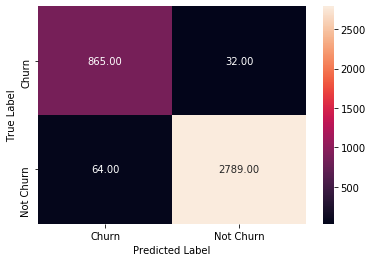

In [21]:
draw_cm(target_test, model.predict(features_test))

The Classification Report of Initial Model is given below:

In [22]:
print(classification_report(target_test, model.predict(features_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2853
           1       0.93      0.96      0.95       897

    accuracy                           0.97      3750
   macro avg       0.96      0.97      0.97      3750
weighted avg       0.97      0.97      0.97      3750



### Model 1

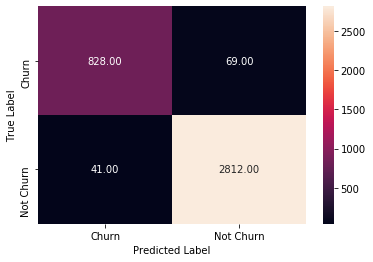

In [23]:
draw_cm(target_test, model_1.predict(features_test))

This model is not able to predict True Positive label for churned employees accurately.

The Classification report of Model 1 is given below:

In [24]:
print(classification_report(target_test, model_1.predict(features_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2853
           1       0.95      0.92      0.94       897

    accuracy                           0.97      3750
   macro avg       0.96      0.95      0.96      3750
weighted avg       0.97      0.97      0.97      3750



### Model 2

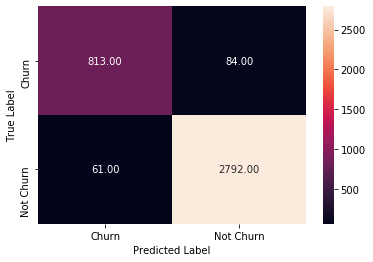

In [25]:
draw_cm(target_test, model_2.predict(features_test))

In [26]:
print(classification_report(target_test, model_2.predict(features_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2853
           1       0.93      0.91      0.92       897

    accuracy                           0.96      3750
   macro avg       0.95      0.94      0.95      3750
weighted avg       0.96      0.96      0.96      3750



Model 2 performs even poorer than Model 1 in predicting the churn of an employee

## Class Imbalance

Earlier, we saw that the dataset is imbalanced. To solve this, here we are going to set the class_weight equal to 'Balanced' in model 1. The resulting performance of the model is given below:

In [27]:
# Initialize it and call model by specifying the random_state parameter
model_1 = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')

# Apply a decision tree model to fit features to the target
model_1.fit(features_train, target_train)

# Printing Model Score
print("Accuracy on Train set:", np.round(model_1.score(features_train, target_train) * 100, 2), "%")
print("Accuracy on Test set:", np.round(model_1.score(features_test, target_test) * 100, 2), "%")
print("ROC-AUC Score on Test set:", np.round(roc_auc_score(target_test, model_1.predict(features_test)) * 100, 2), "%")
print("Precision of Model on Test set:", np.round(precision_score(target_test, model_1.predict(features_test)) * 100, 2), "%")
print("Recall Score on Test set:", np.round(recall_score(target_test, model_1.predict(features_test)) * 100, 2), "%")

Accuracy on Train set: 94.4 %
Accuracy on Test set: 93.71 %
ROC-AUC Score on Test set: 93.53 %
Precision of Model on Test set: 82.69 %
Recall Score on Test set: 93.2 %


Recall has improved. ROC-AUC and Accuracy of the model have reduced. Let's increase max_depth to 7. We got the following results:

In [28]:
# Initialize it and call model by specifying the random_state parameter
model_3 = DecisionTreeClassifier(max_depth=7, random_state=42, class_weight='balanced')

# Apply a decision tree model to fit features to the target
model_3.fit(features_train, target_train)

# Printing Model Score
print("Accuracy on Train set:", np.round(model_3.score(features_train, target_train) * 100, 2), "%")
print("Accuracy on Test set:", np.round(model_3.score(features_test, target_test) * 100, 2), "%")
print("ROC-AUC Score on Test set:", np.round(roc_auc_score(target_test, model_3.predict(features_test)) * 100, 2), "%")
print("Precision of Model on Test set:", np.round(precision_score(target_test, model_3.predict(features_test)) * 100, 2), "%")
print("Recall Score on Test set:", np.round(recall_score(target_test, model_3.predict(features_test)) * 100, 2), "%")

Accuracy on Train set: 97.94 %
Accuracy on Test set: 97.39 %
ROC-AUC Score on Test set: 95.95 %
Precision of Model on Test set: 95.76 %
Recall Score on Test set: 93.2 %


Here, Accuracy, ROC-AUC and Precision of Model has increased.

# Building Model Using GridSearchCV

Here, we will find parameters of the Decision Tree model with best ROC-AUC Score. The result is given below:

In [29]:
# Generate values for maximum depth
depth = [i for i in range(5,21,1)]

# Generate values for minimum sample size
samples = [i for i in range(5,500,11)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

In [47]:
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

param_search = GridSearchCV(model, parameters, cv = 10, scoring='roc_auc_ovr_weighted')

# fit the param_search to the training dataset
param_search.fit(features_train, target_train)

# print the best parameters found
print("Best Parameters found using Grid Search:", param_search.best_params_)

Best Parameters found using Grid Search: {'max_depth': 15, 'min_samples_leaf': 38}


Now, We will build this model using the parameters as shown in above output.

In [48]:
model = DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth = param_search.best_params_['max_depth'],
                              min_samples_leaf = param_search.best_params_['min_samples_leaf'])
# Apply a decision tree model to fit features to the target
model.fit(features_train, target_train)

# Printing Model Score
print("Accuracy on Train set:", np.round(model.score(features_train, target_train) * 100, 2), "%")
print("Accuracy on Test set:", np.round(model.score(features_test, target_test) * 100, 2), "%")
print("ROC-AUC Score on Test set:", np.round(roc_auc_score(target_test, model.predict(features_test)) * 100, 2), "%")
print("Precision of Model on Test set:", np.round(precision_score(target_test, model.predict(features_test)) * 100, 2), "%")
print("Recall Score on Test set:", np.round(recall_score(target_test, model.predict(features_test)) * 100, 2), "%")

Accuracy on Train set: 97.33 %
Accuracy on Test set: 96.88 %
ROC-AUC Score on Test set: 94.89 %
Precision of Model on Test set: 95.67 %
Recall Score on Test set: 91.08 %


## Important Features from Decision Model

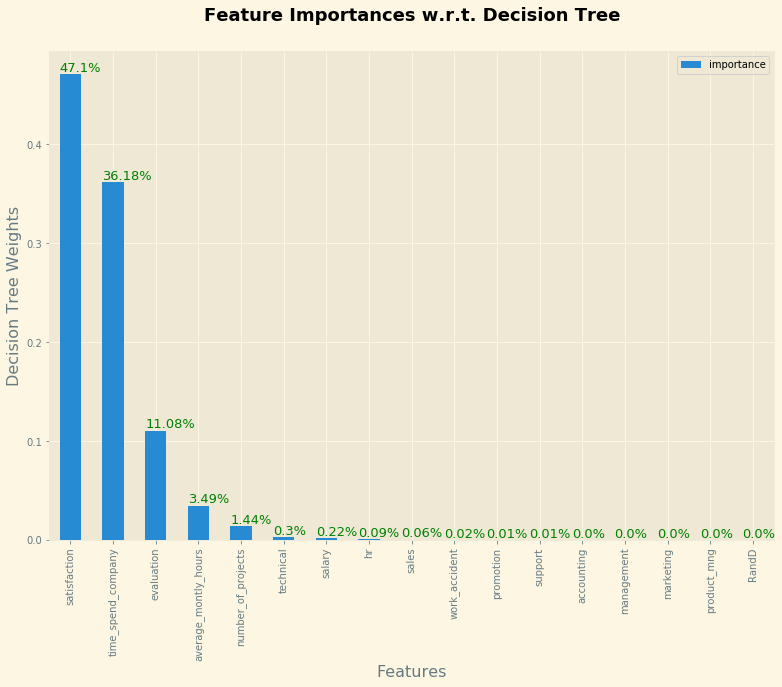

In [49]:
# Calculate feature importances
feature_importances = model.feature_importances_

# Create a list of features: done
feature_list = features_train.columns

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False, inplace=True)

plt.style.use('Solarize_Light2')

ax = relative_importances.plot.bar(figsize=(13, 9))
ax.set_title("Feature Importances w.r.t. Decision Tree", fontsize=18, fontweight='bold', pad=30)
ax.set_xlabel("Features", fontsize=16)
ax.set_ylabel("Decision Tree Weights", fontsize=16)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+.0025, \
        str(round(i.get_height() * 100, 2)) + '%', fontsize=13,
            color='green')
plt.show()

According to Decision Tree Model, Satisfaction Level of an employee, time spent by him in company, his last evaluation in the company, Average Monthly Hours given by him to company and number of projects done by him in the company are the most important features to decide whether the employee will churn or not.

### Rebuilding the Model with Significant Features

The rebuilt model yields the following scores:

In [50]:
col = list(relative_importances[relative_importances.importance > 0.01].index)

model_final = DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth = param_search.best_params_['max_depth'],
                              min_samples_leaf = param_search.best_params_['min_samples_leaf'])
# Apply a decision tree model to fit features to the target
model_final.fit(features_train[col], target_train)

# Printing Model Score
print("Accuracy on Train set:", np.round(model_final.score(features_train[col], target_train) * 100, 2), "%")
print("Accuracy on Test set:", np.round(model_final.score(features_test[col], target_test) * 100, 2), "%")
print("ROC-AUC Score on Test set:", np.round(roc_auc_score(target_test, model_final.predict(features_test[col])) * 100, 2), "%")
print("Precision of Model on Test set:", np.round(precision_score(target_test, model_final.predict(features_test[col])) * 100, 2), "%")
print("Recall Score on Test set:", np.round(recall_score(target_test, model_final.predict(features_test[col])) * 100, 2), "%")

Accuracy on Train set: 97.33 %
Accuracy on Test set: 96.88 %
ROC-AUC Score on Test set: 94.89 %
Precision of Model on Test set: 95.67 %
Recall Score on Test set: 91.08 %


### Visualizing Decision Tree

The final Decision tree is represented as follows in the form of visual:

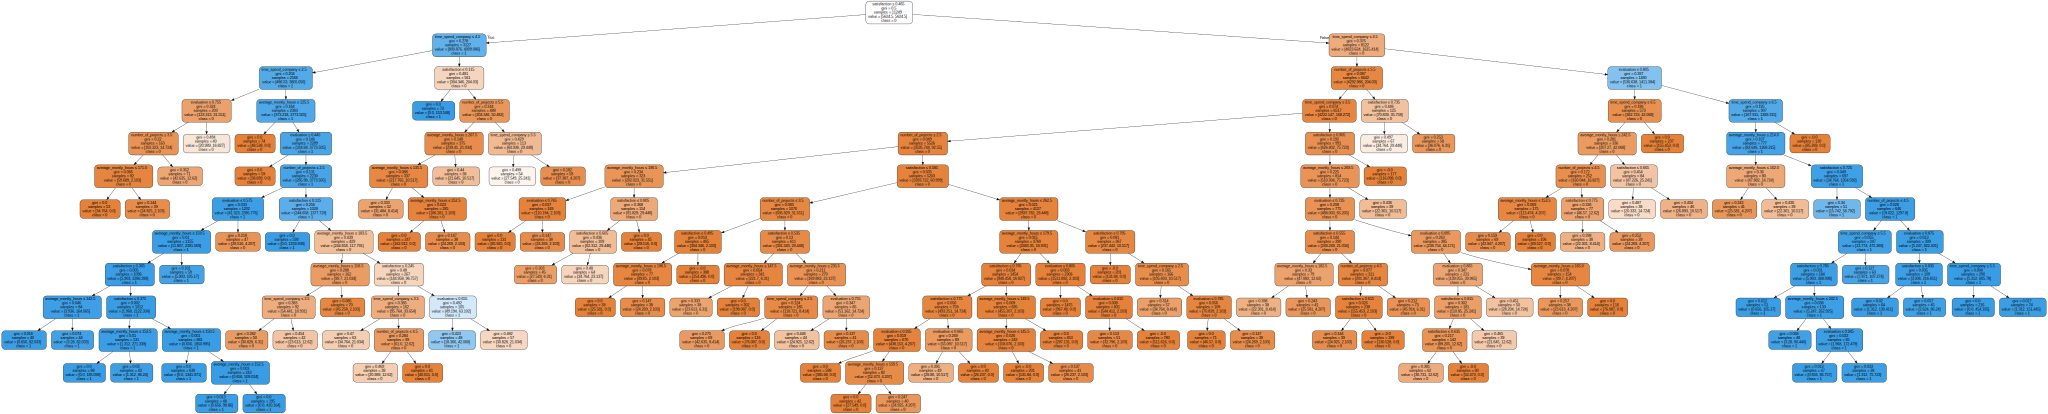

In [51]:
dot_data = tree.export_graphviz(model_final, out_file=None, 
                   feature_names=features_train[col].columns,  
                      class_names=['0', '1'],  
                      filled=True, rounded=True,  
                      special_characters=True)
graph = graphviz.Source(dot_data)
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)
    
graph